# (Dataset Exploration Title)
## by Adnan Aldajani

## Preliminary Wrangling

The data is a data of Ford bike rental service in  San Francisco Bay Area in 2019. It shows timing of start to end of the rental trip, start and end startion and which bike is used.


In [153]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We see that many columns have null values, we need to clean them first

In [5]:
df.dropna(inplace = True);

In [6]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

Make a copy of the dataframe before cleaning

In [7]:
df_clean = df.copy()

start_time and end_time are if type String.
We need to change them to datetime

In [8]:
df_clean.start_time = pd.to_datetime(df_clean.start_time, format = '%Y-%m-%d %H:%M:%S')
df_clean.end_time = pd.to_datetime(df_clean.end_time, format = '%Y-%m-%d %H:%M:%S')

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [10]:
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


start_station_id, end_station_id, bike_id, member_birth_year are of type float.
We need to change them to String

In [11]:
df_clean.start_station_id = df_clean.start_station_id.astype(int).astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(int).astype(str)
df_clean.bike_id = df_clean.bike_id.astype(int).astype(str)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int).astype(str)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

Now we will check for duplicates

In [13]:
df_clean.duplicated().sum()

0

No duplicates found

In [14]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


Now we will add some columns to ease the analysis

Now we add start day column

In [92]:
df_clean['start_day']= df_clean['start_time'].dt.strftime('%a').astype(ordered_weekdays)
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,duration_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,14.495833,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,17.181667,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thu,10.136111,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thu,0.440278,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thu,0.498056,29.883333


In [93]:
# Order the days
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_day'] = df_clean['start_day'].astype(ordered_weekdays)

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

Now we add the age

In [101]:
df_clean['member_age'] = 2019 - df_clean.member_birth_year.astype(int)

Since the data was collected in 2019, we will subtract the birth year from 2019 to get the age of the member

In [102]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,duration_hour,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,14.495833,869.750000,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,17.181667,1030.900000,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thu,10.136111,608.166667,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thu,0.440278,26.416667,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thu,0.498056,29.883333,60


### What is the structure of your dataset?

The dataframe has 174952 individual rides using a bike-sharing service provided by Ford in San Francisco Bay Area in 2019.
The data includes
- trip duration: duration of individual trip in seconds
- start and end time of the trip
- start and end stations: their name, id and location
- bike information: their ID
- day of the week of the rental
- age of the member in the time of the study (2019)

### What is/are the main feature(s) of interest in your dataset?

I will investigate which day is the most rental day of the week. Also, which gender consume the the service more

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- duration
- start_day
- member_gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I will convert the duration to hour to be easier to analyze

In [36]:
df_clean['duration_hour'] = df_clean.duration_sec / 3600

I didn't like the duration in hours so I will change it to minutes

In [39]:
df_clean['duration_min'] = df_clean.duration_sec / 60

In [49]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,duration_hour,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,0.195556,11.733379
std,1642.204905,0.100391,0.117732,0.100295,0.117294,0.456168,27.370082
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,0.016944,1.016667
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,0.089722,5.383333
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,0.141667,8.500000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,0.219167,13.150000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,23.485556,1409.133333


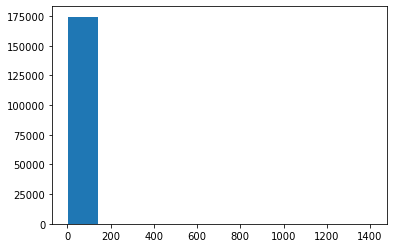

In [54]:
plt.hist(data = df_clean, x = 'duration_min');

We see that the data is not clear and needs to be scaled using log scale

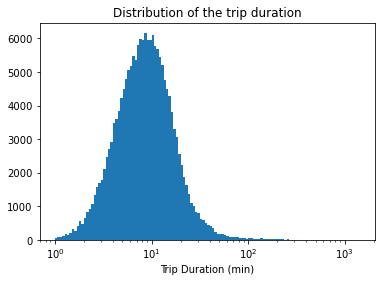

In [59]:
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+0.025, 0.025)
plt.hist(data = df_clean, x = 'duration_min', bins = bins);
plt.xscale('log')
plt.xlabel('Trip Duration (min)');
plt.title('Distribution of the trip duration');

Now we see that it is normaly distributed

array([[<AxesSubplot:title={'center':'member_age'}>]], dtype=object)

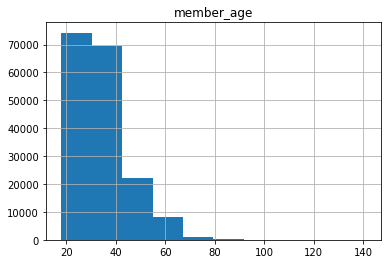

In [109]:
## check the age
df_clean.hist('member_age')

In [110]:
df_clean.member_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

It is impossible for a persone that is 141 years old to ride a bike, I will clean the data

In [113]:
df_clean = df_clean.query('member_age <= 60')

In [114]:
df_clean.member_gender.value_counts()

Male      127520
Female     40305
Other       3597
Name: member_gender, dtype: int64

In [115]:
df_clean.groupby('member_gender').duration_min.describe()

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Female,40305.0,12.973954,29.924509,1.016667,6.016667,9.450000,14.383333,1386.583333
Male,127520.0,11.185903,25.281093,1.016667,5.183333,8.200000,12.650000,1409.133333
Other,3597.0,16.624729,59.167409,1.050000,5.700000,9.216667,14.450000,1375.200000


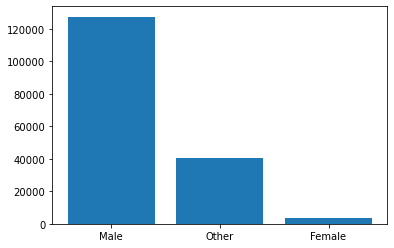

In [116]:
x = df_clean.member_gender.unique()
y = df_clean.member_gender.value_counts()
plt.bar(x,y);

Males use the service much more than other genders

<AxesSubplot:xlabel='start_day', ylabel='count'>

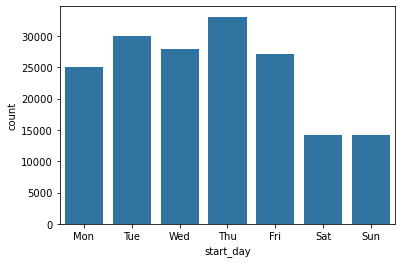

In [117]:
x = df_clean.start_day.unique()
y = df_clean.start_day.value_counts(sort = False)
#plt.bar(x,y);
sb.countplot(data = df_clean, x = 'start_day', color = sb.color_palette()[0])
#['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

As expected, weekends have the lowest rental rate since people are not going to work. The day with most rents is Thursday

<AxesSubplot:xlabel='user_type', ylabel='count'>

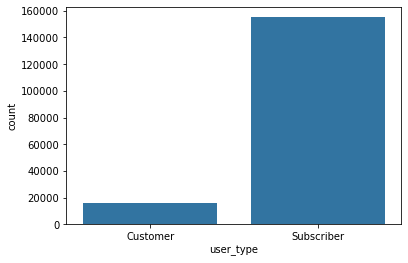

In [118]:
sb.countplot(data = df_clean, x = 'user_type', color = sb.color_palette()[0])

Subscribers are much more than consumers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

No everything is looking good and the data is normaly distributed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

no they are tidy, but needed to be scaled

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

We want to check the relation between the age and the duration of the trip

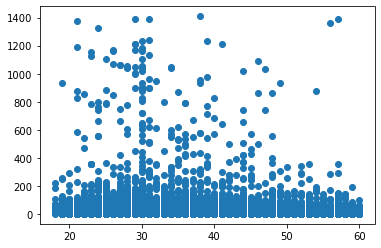

In [144]:
sample = df_clean.sample(500)
plt.scatter(data = df_clean, x= 'member_age', y = 'duration_min')

It is hard to tell that there is any relation between the age and the duration of the trip

I can conclude that there is not relation between the age and the trip duration

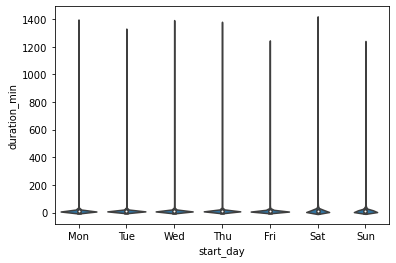

In [172]:
g = sb.violinplot(data = df_clean, x = 'start_day', y = 'duration_min', log = True, color=sb.color_palette()[0]);

We need to scale it

<ipython-input-173-0577e3824544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_duration'] = np.log10(df_clean.duration_min)


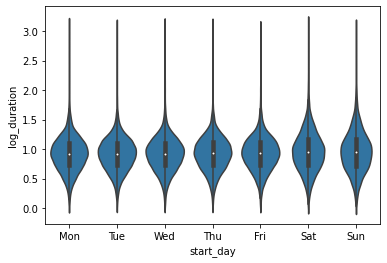

In [173]:
df_clean['log_duration'] = np.log10(df_clean.duration_min)
g = sb.violinplot(data = df_clean, x = 'start_day', y = 'log_duration', color=sb.color_palette()[0]);

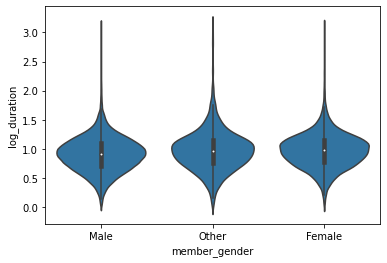

In [174]:
g = sb.violinplot(data = df_clean, x = 'member_gender', y = 'log_duration', log = True, color=sb.color_palette()[0]);

We can observe from the plot above that there are more bike rides close to the mean, which is almost 11. And Saturday and Sundays have more than average rides compared to the rest of the days

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- There is no relation between the age and the duration
- Saturday and Sundays have more than average rides compared to the rest of the days
- Female average trip is higher than other gender trips

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
I was surprised that trips were higher in weekdays compared to weekends. At first I thought that weekends trips are more.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<ipython-input-197-f535101134ed>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data = df_clean[df['user_type'] == 'Customer'],
<ipython-input-197-f535101134ed>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data = df_clean[df['user_type'] == 'Subscriber'],


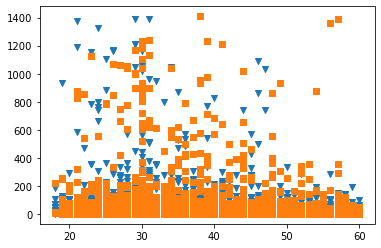

In [197]:
plt.scatter(data = df_clean[df['user_type'] == 'Customer'],
            x = 'member_age',
            y = 'duration_min',
            marker = 'v', alpha= 1)
plt.scatter(data = df_clean[df['user_type'] == 'Subscriber'],
            x = 'member_age',
            y = 'duration_min',
            marker = 's', alpha= 1)

just to make it clearer, I will separate them

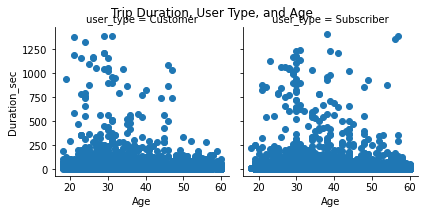

In [198]:
user_type = sb.FacetGrid(data = df_clean, col = 'user_type', col_wrap = 2)
user_type.map(plt.scatter, 'member_age', 'duration_min', alpha= 1)

user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')
user_type.fig.suptitle('Trip Duration, User Type, and Age')
plt.show()

<ipython-input-191-63ad1454e9bd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data = df_clean[df['member_gender'] == 'Male'],
<ipython-input-191-63ad1454e9bd>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data = df_clean[df['member_gender'] == 'Female'],
<ipython-input-191-63ad1454e9bd>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data = df_clean[df['member_gender'] == 'Other'],


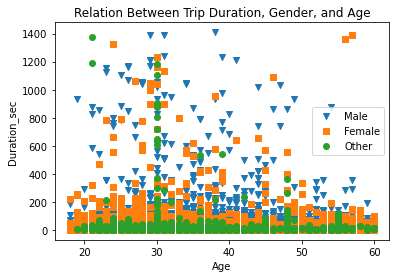

In [191]:
plt.scatter(data = df_clean[df['member_gender'] == 'Male'],
            x = 'member_age',
            y = 'duration_min',
            marker = 'v', alpha= 1)
plt.scatter(data = df_clean[df['member_gender'] == 'Female'],
            x = 'member_age',
            y = 'duration_min',
            marker = 's', alpha= 1)
plt.scatter(data = df_clean[df['member_gender'] == 'Other'],
            x = 'member_age',
            y = 'duration_min',
            marker = 'o', alpha= 1)

plt.legend(['Male','Female','Other']);
plt.title('Relation Between Trip Duration, Gender, and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

We can not conclude anything, this plot is not clear

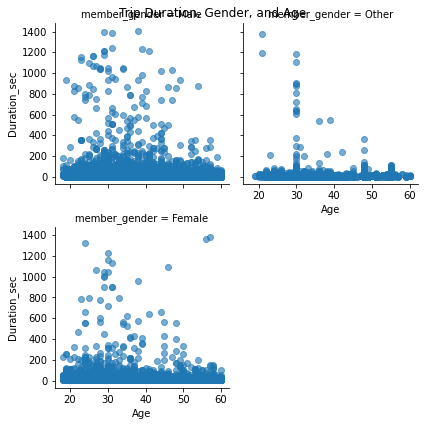

In [199]:
gender = sb.FacetGrid(data = df_clean, col = 'member_gender', col_wrap = 2)
gender.map(plt.scatter, 'member_age', 'duration_min', alpha= 0.6)

gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
gender.fig.suptitle('Trip Duration, Gender, and Age')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The age to duration relation is almost the same for both consumer and subscriber user types
- Even though male percentage is much higher than other genders, it has the lowest duration for to age relation compared female and other genders

### Were there any interesting or surprising interactions between features?

We see that there is a longer trip durations for males in the age of 30